# **Proyek Recommendation System: [Book Recomemendation System]**
*   Nama: Gettar Adhi Pinaringan
*   Email: mc011d5y2325@student.devacademy.id
*   ID Dicoding: mc011d5y2325

##  **Latar Belakang**

Dalam beberapa tahun terakhir, kehadiran sistem rekomendasi semakin terasa di berbagai layanan digital, terutama dengan pesatnya pertumbuhan platform seperti YouTube, Amazon, dan Netflix. Sistem ini telah menjadi komponen kunci dalam pengalaman pengguna, mulai dari menyarankan film, lagu, produk, hingga buku yang kemungkinan besar akan disukai berdasarkan minat dan kebiasaan masing-masing individu.

Secara sederhana, sistem rekomendasi bekerja dengan memanfaatkan algoritma untuk menampilkan item yang relevan bagi pengguna, menggunakan data interaksi maupun preferensi sebelumnya. Di berbagai sektor, sistem ini terbukti meningkatkan keterlibatan pengguna dan berkontribusi besar terhadap pertumbuhan bisnis. Sebagai contoh, Netflix pernah menyelenggarakan kompetisi global bernama *Netflix Prize* dengan hadiah sebesar 1 juta dolar AS, untuk siapa pun yang dapat meningkatkan performa sistem rekomendasi mereka.

Dalam industri literasi dan perbukuan, sistem rekomendasi dapat menjadi alat yang sangat berharga untuk membantu pembaca menemukan bacaan yang sesuai selera. Di sisi lain, penerbit dan toko buku daring juga dapat memanfaatkannya untuk meningkatkan penjualan dan retensi pelanggan.

---

##  **Pertanyaan Utama**

* Bagaimana cara mengenali pola preferensi pengguna terhadap buku dari data `df_rating` yang tersedia?
* Bagaimana menyarankan buku yang belum pernah dibaca oleh pengguna, tetapi berpotensi sesuai dengan minatnya, berdasarkan kemiripan perilaku dengan pengguna lain?
* Bagaimana menyajikan hasil eksplorasi data secara visual agar dapat mendukung pemahaman dan pengembangan sistem rekomendasi yang efektif?

---

##  **Tujuan**

* Menganalisis dan memproses data `df_rating` untuk memahami karakteristik interaksi antara pengguna dan buku.
* Membangun sistem rekomendasi menggunakan metode **collaborative filtering**, dengan fokus pada kesamaan preferensi antar pengguna untuk menghasilkan saran yang relevan.
* Menampilkan hasil eksplorasi data dalam bentuk **visualisasi interaktif**, seperti bar chart atau distribusi, untuk memperkuat proses analisis dan membantu dalam pengambilan keputusan berbasis data.

---

Jika Anda menginginkan versi yang lebih ringkas atau akademik, atau ingin menyesuaikan nada tulisannya untuk laporan atau presentasi, saya bisa bantu sesuaikan juga.


**Sumber Dataset:** https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

***Deskripsi:***

Dataset Book Recommendation Dataset merupakan kumpulan data yang terdiri dari tiga file utama: Users, Ratings, dan Books. File Users menyimpan informasi mengenai pengguna, di mana setiap pengguna diidentifikasi dengan ID unik yang telah dianonimkan menjadi angka. Selain itu, terdapat data demografis seperti lokasi dan usia, meskipun beberapa nilai mungkin kosong atau tidak tersedia. File Ratings menyajikan data penilaian buku oleh pengguna. Penilaian ini bisa berupa eksplisit (rentang 1–10, semakin tinggi menunjukkan apresiasi yang lebih besar) atau implisit (ditandai dengan nilai 0, menunjukkan interaksi tanpa penilaian langsung). Terakhir, file Books berisi informasi tentang buku yang diidentifikasi dengan ISBN. Selain judul buku, nama penulis (hanya yang pertama jika lebih dari satu), tahun terbit, dan penerbit, file ini juga mencantumkan tautan gambar sampul dalam tiga ukuran berbeda (kecil, sedang, besar) yang diambil dari situs Amazon. Dataset ini banyak digunakan untuk membangun dan menguji sistem rekomendasi berbasis buku.

## **Import Library**

Pada cell ini, dilakukan proses import berbagai library yang dibutuhkan untuk menjalankan proyek **machine learning dan deep learning**:
* **gdown**
  untuk mempermudah pemasukan data
* **pandas**
  Digunakan untuk memproses dan memanipulasi data dalam bentuk **DataFrame**. Sangat penting untuk analisis data tabular seperti membaca file CSV, menggabungkan data, melakukan filtering, agregasi, dan transformasi data.

* **numpy**
  Digunakan untuk **operasi numerik dan manipulasi array multidimensi**. Banyak digunakan dalam komputasi ilmiah, statistik, dan mendukung perhitungan matematis tingkat lanjut yang efisien.

* **matplotlib.pyplot** dan **seaborn**
  Merupakan library untuk **visualisasi data**:

  * `matplotlib.pyplot`: Untuk membuat grafik dasar seperti line plot, bar chart, scatter plot, dll.
  * `seaborn`: Berbasis matplotlib, namun menawarkan tampilan grafik yang lebih menarik dan fungsi bawaan untuk visualisasi statistik seperti heatmap, boxplot, histogram, dsb.

* **tensorflow**, **keras**, dan **layers**
  Merupakan library untuk membangun model **deep learning**:

  * `tensorflow`: Framework machine learning open-source dari Google.
  * `keras`: Antarmuka API tingkat tinggi dari TensorFlow yang memudahkan pembangunan neural network.
  * `layers`: Digunakan untuk menyusun lapisan-lapisan model neural network (misalnya Dense, Dropout, Conv2D, dll.).

* **train\_test\_split** (dari `sklearn.model_selection`)
  Digunakan untuk **membagi dataset menjadi data latih dan data uji**, yang penting dalam proses validasi model agar performa model bisa diuji pada data yang belum pernah dilihat sebelumnya.

In [1]:
# Import library utama untuk analisis data dan visualisasi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import io

# Import library untuk membangun model machine learning berbasis deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Import library untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Menonaktifkan peringatan (warnings) agar output notebook lebih bersih dan tidak terganggu oleh pesan peringatan
import warnings
warnings.simplefilter('ignore')

# **Data Understanding**

Data Understanding merupakan tahap awal yang krusial dalam pengembangan proyek machine learning maupun data science. Tahap ini bertujuan untuk memahami isi, struktur, serta kualitas data yang akan dianalisis. Dalam proyek ini, proses Data Understanding akan dilakukan melalui tiga tahapan utama, yaitu:
- Melakukan load dataset dan mengubah nama kolom
- Melakukan univariate exploratory data analysis
- Melakukan visualisasi data

## **Melakukan Load dataset dan mengubah nama kolom**

In [2]:
# Books.csv
!gdown --id 1wr0WVRph_JGr_Aik37V0zXSEqxaGVM7x -O Books.csv

# Ratings.csv
!gdown --id 1VLIYsD_6zYz2jr78k9X-3Tnmq3a6qB28 -O Ratings.csv

# Users.csv
!gdown --id 10GUNO4w8amC5dANl-X7XLP_2zPh1g8vu -O Users.csv

df_books = pd.read_csv("Books.csv")
df_rating = pd.read_csv("Ratings.csv")
df_user = pd.read_csv("Users.csv")

# Mengubah nama kolom agar lebih konsisten dan mudah digunakan
df_rating.rename(columns={'Book-Rating': 'Rating', 'User-ID': 'User_id'}, inplace=True)
df_user.rename(columns={'User-ID': 'User_id'}, inplace=True)
df_books.rename(columns={'Book-Title': 'Title', 'Book-Author': 'Author', 'Year-Of-Publication': 'Year'}, inplace=True)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wr0WVRph_JGr_Aik37V0zXSEqxaGVM7x
To: /content/Books.csv
100% 73.3M/73.3M [00:01<00:00, 37.7MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VLIYsD_6zYz2jr78k9X-3Tnmq3a6qB28
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 53.2MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.

## **Univariate Exploratory Data Analysis**


**Fitur-fitur dalam *Book Recommendation System Dataset* adalah:**

**\[df\_user]**

* **user\_id**: ID unik yang merepresentasikan masing-masing pengguna.
* **location**: Lokasi geografis pengguna, dapat mencakup negara, kota, atau kode pos.
* **age**: Usia pengguna. Nilai dapat kosong atau tidak valid.

**\[df\_books]**

* **ISBN**: Nomor unik identifikasi buku.
* **title**: Judul buku.
* **author**: Nama penulis buku.
* **year**: Tahun publikasi buku.
* **publisher**: Nama penerbit buku.
* **image\_url\_s / image\_url\_m / image\_url\_l**: Tautan ke gambar sampul buku dalam resolusi kecil (s), sedang (m), dan besar (l).

**\[df\_rating]**

* **user\_id**: ID pengguna yang memberikan rating terhadap buku.
* **ISBN**: ID buku yang diberi rating.
* **rating**: Nilai rating yang diberikan oleh pengguna terhadap buku, dalam skala 0–10. Nilai 0 dapat berarti tidak ada rating eksplisit.


**Menampilkan lima baris pertama dari masing-masing dataset**

In [3]:
# Menampilkan 5 data pertama dari dataset df_user
print("\nContoh data dari dataset df_user:")
print(df_user.head(5))


Contoh data dari dataset df_user:
   User_id                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [4]:
# Menampilkan 5 data pertama dari dataset df_rating
print("\nContoh data dari dataset df_rating:")
print(df_rating.head(5))


Contoh data dari dataset df_rating:
   User_id        ISBN  Rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0
3   276729  052165615X       3
4   276729  0521795028       6


In [5]:
# Menampilkan 5 data pertama dari dataset df_books
print("\nContoh data dari dataset df_books:")
print(df_books.head(5))


Contoh data dari dataset df_books:
         ISBN                                              Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 Author  Year                   Publisher  \
0    Mark P. O. Morford  2002     Oxford University Press   
1  Richard Bruce Wright  2001       HarperFlamingo Canada   
2          Carlo D'Este  1991             HarperPerennial   
3      Gina Bari Kolata  1999        Farrar Straus Giroux   
4       E. J. W. Barber  1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.ama

**Menampilkan informasi dari masing-masing dataset**

In [6]:
# Membuat fungsi bantu untuk menangkap output dari .info()
def get_info(df, name):
    buffer = io.StringIO()
    print(f"\n=== Informasi Dataset: {name} ===")
    df.info(buf=buffer)
    print(buffer.getvalue())

# Menampilkan informasi masing-masing dataset dalam satu cell
get_info(df_user, 'df_user')
get_info(df_rating, 'df_rating')
get_info(df_books, 'df_books')



=== Informasi Dataset: df_user ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


=== Informasi Dataset: df_rating ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


=== Informasi Dataset: df_books ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  



Pada dataset `Users`, terdapat banyak nilai yang hilang (missing values) pada kolom `Age`, yang menunjukkan bahwa informasi usia tidak selalu tersedia untuk setiap pengguna. Sementara itu, dataset `Ratings` tidak mengandung missing values, sehingga data penilaian dapat digunakan secara utuh tanpa perlu penanganan khusus. Di sisi lain, pada dataset `Books` ditemukan 2 missing values pada kolom `Author` dan `Publisher`. Selain itu, 3 missing values pada kolom `Image-URL-L`, yang mungkin perlu dibersihkan atau diisi ulang sebelum digunakan dalam pemodelan atau analisis lanjutan.

**Menampilkan jumlah baris dan kolom**

In [7]:
# Menampilkan jumlah baris dan kolom pada dataset df_user, df_rating, dan df_books
print(f"User dataset total rows: {df_user.shape[0]}, and total columns: {df_user.shape[1]}")
print(f"Rating dataset total rows: {df_rating.shape[0]}, and total columns: {df_rating.shape[1]}")
print(f"Books dataset total rows: {df_books.shape[0]}, and total columns: {df_books.shape[1]}")

User dataset total rows: 278858, and total columns: 3
Rating dataset total rows: 1149780, and total columns: 3
Books dataset total rows: 271360, and total columns: 8




 Dataset Users memiliki 278.858 baris dan 3 kolom, yang mencerminkan jumlah pengguna unik beserta informasi demografis yang tersedia. Dataset Ratings terdiri dari 1.149.780 baris dan 3 kolom, menunjukkan bahwa terdapat lebih dari satu juta interaksi pengguna dengan buku dalam bentuk penilaian. Sementara itu, dataset Books mencakup 271.360 baris dan 5 kolom, yang berisi informasi detail mengenai berbagai buku seperti judul, penulis, tahun terbit, penerbit, dan URL gambar. Jumlah data yang besar ini memberikan dasar yang kuat untuk membangun sistem rekomendasi yang akurat dan komprehensif.

**Melakukan Visualisasi sebelum masuk ke tahap data preparation**

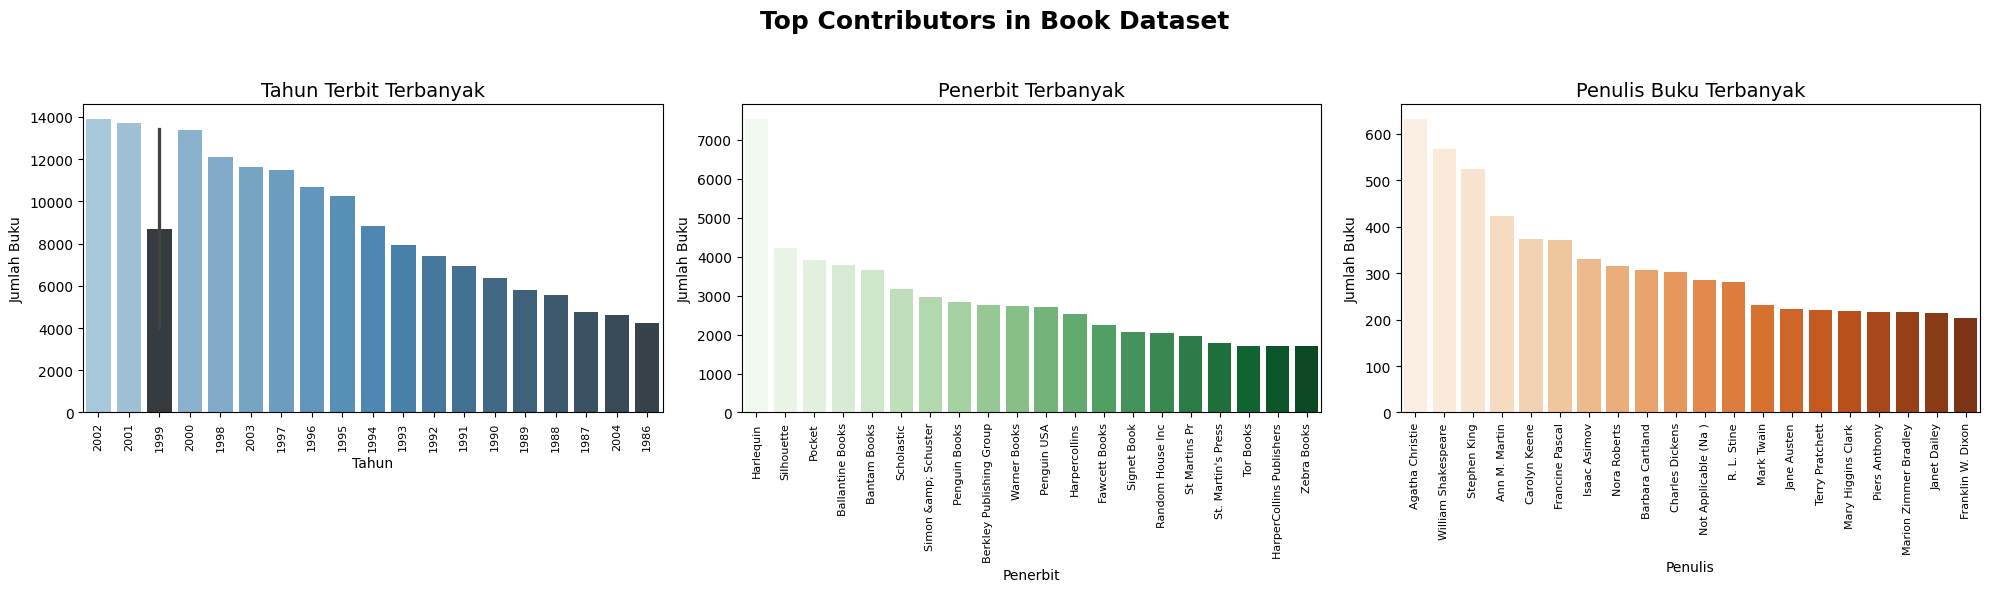

In [8]:
# Menghitung 20 entri teratas berdasarkan jumlah kemunculan untuk Year, Publisher, dan Author
df_books_qty = df_books['Year'].value_counts().reset_index(name='Count').rename(columns={'index': 'Year'}).sort_values('Count', ascending=False).head(20)
publisher_qty = df_books['Publisher'].value_counts().reset_index(name='Count').rename(columns={'index': 'Publisher'}).sort_values('Count', ascending=False).head(20)
author_qty = df_books['Author'].value_counts().reset_index(name='Count').rename(columns={'index': 'Author'}).sort_values('Count', ascending=False).head(20)

# Setup visualisasi
plt.figure(figsize=(20, 6))
plt.suptitle("Top Contributors in Book Dataset", fontsize=18, fontweight='bold')

# Plot untuk Tahun Terbit
plt.subplot(1, 3, 1)
sns.barplot(data=df_books_qty, x='Year', y='Count', palette='Blues_d')  # Ganti warna ke palet biru gelap
plt.title('Tahun Terbit Terbanyak', fontsize=14)
plt.xlabel('Tahun', fontsize=10)
plt.ylabel('Jumlah Buku', fontsize=10)
plt.xticks(rotation=90, fontsize=8)

# Plot untuk Penerbit Terbanyak
plt.subplot(1, 3, 2)
sns.barplot(data=publisher_qty, x='Publisher', y='Count', palette='Greens')  # Ganti warna ke palet hijau
plt.title('Penerbit Terbanyak', fontsize=14)
plt.xlabel('Penerbit', fontsize=10)
plt.ylabel('Jumlah Buku', fontsize=10)
plt.xticks(rotation=90, fontsize=8)

# Plot untuk Penulis Terbanyak
plt.subplot(1, 3, 3)
sns.barplot(data=author_qty, x='Author', y='Count', palette='Oranges')  # Ganti warna ke palet oranye
plt.title('Penulis Buku Terbanyak', fontsize=14)
plt.xlabel('Penulis', fontsize=10)
plt.ylabel('Jumlah Buku', fontsize=10)
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Menyesuaikan layout agar tidak terpotong oleh judul
plt.show()




Visualisasi menunjukkan bahwa tahun terbit terbanyak berasal dari tahun **2002**, diikuti oleh **2001** dan **2000**, masing-masing dengan jumlah buku yang sangat signifikan. Hal ini mengindikasikan bahwa dataset memiliki dominasi buku-buku yang diterbitkan pada awal 2000-an, yang mungkin dipengaruhi oleh perkembangan digitalisasi data saat itu.

Untuk penerbit, **Harlequin** menjadi penyumbang terbanyak dengan lebih dari 7.000 judul buku, disusul oleh **Silhouette**, **Pocket Books**, dan **Ballantine Books**. Ini menunjukkan bahwa penerbit besar dengan fokus pada fiksi populer sangat dominan dalam dataset ini.

Sementara itu, pada kategori penulis, **Agatha Christie** menjadi penulis dengan jumlah buku terbanyak, diikuti oleh **William Shakespeare**, **Ann M. Martin**, dan **Stephen King**. Banyaknya buku dari penulis-penulis terkenal ini mencerminkan popularitas dan produktivitas mereka serta bagaimana karya mereka sering dimuat dalam sistem distribusi buku global.

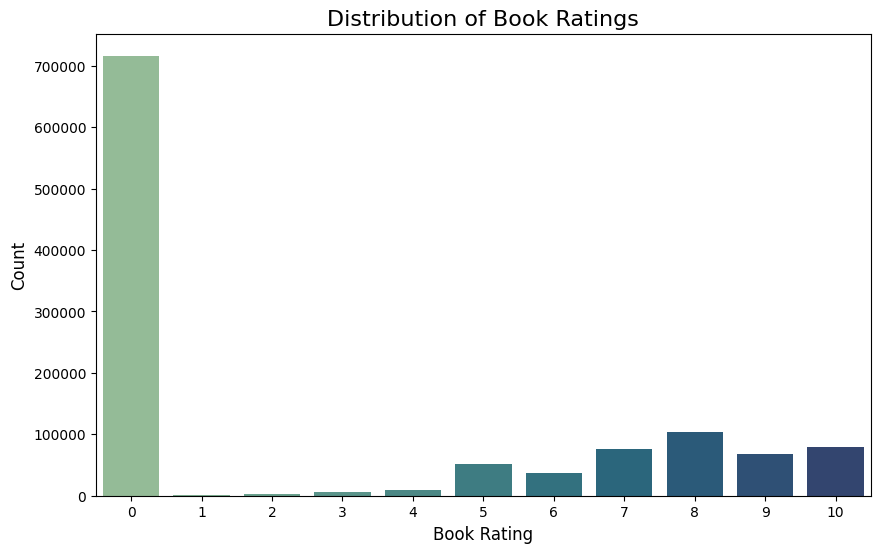

In [9]:
# Visualisasi distribusi rating buku dari dataset 'df_rating'
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df_rating, palette='crest')  # Palet gradasi
plt.title("Distribution of Book Ratings", fontsize=16)
plt.xlabel("Book Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



Distribusi df_rating buku menunjukkan bahwa df_rating 0 mendominasi secara signifikan dengan jumlah lebih dari 700.000 entri. Ini mengindikasikan bahwa sebagian besar interaksi dalam dataset merupakan df_rating implisit, di mana pengguna hanya membaca atau melihat buku tanpa memberikan penilaian eksplisit.

Sementara itu, untuk df_rating eksplisit (1–10), sebagian besar pengguna cenderung memberikan df_rating tinggi — terutama pada nilai 8, 10, dan 7, yang jumlahnya jauh lebih besar dibanding df_rating rendah (1–4). Pola ini mencerminkan kecenderungan pengguna untuk hanya menilai buku yang mereka sukai atau merasa puas terhadapnya, dan mengabaikan atau tidak menilai buku yang tidak disukai.

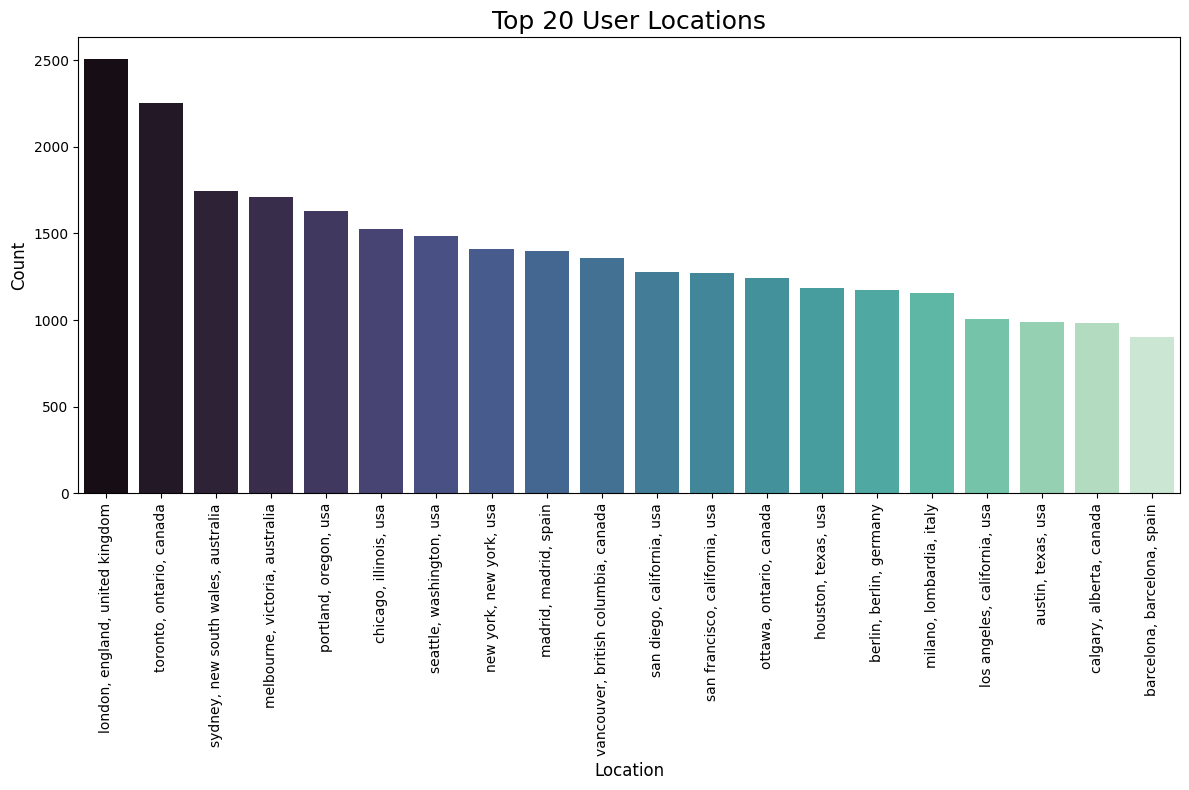

In [10]:
# Mengambil 20 lokasi pengguna terbanyak berdasarkan jumlah kemunculannya
df_user_location = df_user['Location'].value_counts().reset_index(name='Count').sort_values('Count', ascending=False).head(20)

# Visualisasi 20 lokasi pengguna terbanyak
plt.figure(figsize=(12, 8))
sns.barplot(data=df_user_location, x='Location', y='Count', palette='mako')  # Palet gradasi lainnya
plt.xticks(rotation=90, fontsize=10)
plt.title('Top 20 User Locations', fontsize=18)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()



Visualisasi menunjukkan bahwa mayoritas pengguna berasal dari negara-negara berbahasa Inggris, terutama:

- London, England, United Kingdom menjadi lokasi pengguna terbanyak dengan lebih dari 2.500 pengguna.
- Disusul oleh kota-kota besar seperti Toronto, Ontario (Canada) dan Sydney, New South Wales (Australia).
- Beberapa kota besar di Amerika Serikat seperti Portland, Chicago, Seattle, New York, dan San Francisco juga mendominasi jumlah pengguna.

Selain itu, terlihat kontribusi signifikan dari kota-kota di Eropa seperti Madrid (Spanyol), Berlin (Jerman), dan Milano (Italia) serta beberapa kota di Kanada dan Australia.

Pola ini mengindikasikan bahwa data pengguna dalam dataset Book Recommendation didominasi oleh kawasan Amerika Utara, Eropa Barat, dan Australia, yang mungkin mencerminkan preferensi dan budaya literasi dari wilayah tersebut. Hal ini penting diperhatikan saat membangun sistem rekomendasi agar dapat mempertimbangkan keberagaman lokasi dan konteks budaya pengguna.

# **Data Preparation**

Pada proyek ini, tahap data preparation dilakukan untuk memastikan bahwa data yang digunakan dalam model rekomendasi berada dalam kondisi yang optimal. Tujuan utama dari tahap ini adalah untuk membersihkan dan menyesuaikan struktur data mentah agar siap digunakan dalam algoritma collaborative filtering.

1. **Pembersihan Data <br>**
Proses pembersihan data dilakukan melalui beberapa tahapan berikut:

- Mengecek dan Menangani Missing Values pada Dataset User dan Books <br>
Data diperiksa untuk mendeteksi nilai yang hilang (missing values) dan dilakukan penanganan seperti penghapusan atau imputasi tergantung pada konteks kolom yang bersangkutan.

- Meengecek Duplikasi pada Masing-Masing Dataset <br>
Duplikat pada dataset User dan Books diidentifikasi dan dihapus agar tidak mempengaruhi distribusi data maupun hasil analisis.

- Menggabungkan Dataset Rating dan Books <br>
Dataset Rating digabung dengan Books menggunakan kolom ISBN untuk memperoleh informasi buku secara lengkap dalam satu tabel.

- Seleksi Pengguna dan Buku Berdasarkan Aktivitas Rating <br>
  - Mengelompokkan data berdasarkan df_user_id, lalu memilih 20 pengguna dengan jumlah df_rating terbanyak.
  - Mengelompokkan data berdasarkan judul buku dan mengurutkannya berdasarkan jumlah df_rating terbanyak untuk mendapatkan buku-buku yang paling sering didf_rating.

- Menangani Duplikasi dan Missing Values pada Dataset Gabungan <br>
Setelah penggabungan, dilakukan pemeriksaan ulang untuk mendeteksi duplikasi dan nilai kosong pada dataset gabungan, serta dilakukan penanganan agar data tetap bersih dan valid.

- Melakukan Sampling Dataset <br>
Karena ukuran data yang besar, dilakukan teknik sampling untuk mengambil subset data yang representatif. Hal ini dilakukan guna mempercepat proses pelatihan model tanpa mengorbankan kualitas hasil.

2. **Pra-pemrosesan Data untuk Collaborative Filtering**<br>
Setelah tahap pembersihan awal selesai, proses dilanjutkan dengan pra-pemrosesan data khusus untuk model collaborative filtering, sebagai berikut:

- Menyalin Dataset <br>
Dataset dibagi dengan membuat salinan khusus untuk kebutuhan pemodelan agar data asli tetap utuh dan tidak terpengaruh oleh proses selanjutnya.

- Encoding <br>
Kolom df_user_id dan ISBN dikonversi ke dalam format numerik agar dapat diproses oleh algoritma collaborative filtering.

- Pembagian Data <br>
Dataset yang telah diproses kemudian dibagi menjadi dua bagian: 80% untuk training dan 20% untuk testing. Data training digunakan untuk membangun model, sedangkan data testing digunakan untuk mengukur performa model pada data yang belum pernah dilihat sebelumnya.



## **Mengecek dan Menangani Missing Values pada Dataset User**

In [11]:
# Menampilkan ringkasan informasi dari dataset df_user, termasuk jumlah entri, tipe data, dan jumlah nilai non-null
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
# Mengisi missing values pada kolom 'Age' dengan nilai yang paling sering muncul (modus)
most_frequent_age = df_user['Age'].mode()[0]  # Ambil nilai modus
df_user['Age'].fillna(most_frequent_age, inplace=True)  # Isi nilai NaN dengan modus

In [13]:
# Mengecek kembali apakah masih terdapat missing values atau tidak
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB




Untuk menangani missing values pada kolom Age di dataset Users, dilakukan pengisian menggunakan nilai yang paling sering muncul (modus). Pendekatan ini dipilih karena nilai modus dianggap mewakili mayoritas usia pengguna dalam data yang tersedia, serta dapat meminimalkan distorsi terhadap distribusi data asli. Dengan mengisi nilai kosong menggunakan modus, proses ini membantu menjaga konsistensi data tanpa menghapus baris yang mungkin masih mengandung informasi penting lainnya.


## **Mengecek dan Menangani Missing Values pada dataset Books**

In [14]:
# Menampilkan ringkasan informasi dari dataset df_books, termasuk jumlah entri, tipe data, dan jumlah nilai non-null
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ISBN         271360 non-null  object
 1   Title        271360 non-null  object
 2   Author       271358 non-null  object
 3   Year         271360 non-null  object
 4   Publisher    271358 non-null  object
 5   Image-URL-S  271360 non-null  object
 6   Image-URL-M  271360 non-null  object
 7   Image-URL-L  271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [15]:
# Menghapus baris yang memiliki missing values di kolom 'Author'
df_books.dropna(subset=['Author'], inplace=True)

# Cek kembali apakah masih ada missing values di kolom 'Autho'
print("Jumlah nilai kosong pada kolom Author setelah dihapus:", df_books['Author'].isnull().sum())

Jumlah nilai kosong pada kolom Author setelah dihapus: 0


In [16]:
# Menghapus baris yang memiliki missing values di kolom 'Publisher'
df_books.dropna(subset=['Publisher'], inplace=True)

# Cek kembali apakah masih ada missing values di kolom 'Publisher'
print("Jumlah nilai kosong pada kolom Publisher setelah dihapus:", df_books['Publisher'].isnull().sum())

Jumlah nilai kosong pada kolom Publisher setelah dihapus: 0


In [17]:
# Menghapus kolom dari image URL S, image URL M, dan image URL L
df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True, errors='ignore')

In [18]:
# Mengecek kembali pada kolom df_books
df_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271356 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271356 non-null  object
 1   Title      271356 non-null  object
 2   Author     271356 non-null  object
 3   Year       271356 non-null  object
 4   Publisher  271356 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB




Untuk menangani missing values pada dataset Books, dilakukan dua pendekatan yang berbeda. Pada kolom `Author` dan `Publisher`, karena jumlah missing values sangat sedikit, maka baris yang mengandung nilai kosong dihapus agar tidak memengaruhi integritas data secara keseluruhan. Sementara itu, kolom `Image-URL-S`, `Image-URL-M`, dan `Image-URL-L` dihapus dari dataset karena informasi gambar tidak digunakan dalam sistem rekomendasi ini. Penghapusan kolom tersebut juga membantu menyederhanakan struktur data dan mempercepat proses pemrosesan.

## **Mengecek apakah ada data duplikat dari masing-masing dataset**

In [19]:
# Mengecek apakah ada baris duplikat pada dataset df_user
df_user.duplicated().sum()

np.int64(0)

In [20]:
# Mengecek apakah ada baris duplikat pada dataset df_rating
df_rating.duplicated().sum()

np.int64(0)

In [21]:
# Mengecek apakah ada baris duplikat pada dataset df_books
df_books.duplicated().sum()

np.int64(0)



Setelah dilakukan pengecekan terhadap ketiga dataset — Users, Ratings, dan Books — tidak ditemukan adanya baris duplikat. Hal ini menunjukkan bahwa setiap entri pada data bersifat unik dan tidak ada pengulangan informasi, sehingga tidak diperlukan proses penghapusan duplikat. Kondisi ini sangat mendukung kualitas data dan memperkuat keandalan analisis serta pemodelan sistem rekomendasi yang akan dibangun.

## **Menggabungkan dataset df_rating dan df_books berdasarkan kolom ISBN**

In [22]:
# Menggabungkan data df_rating dengan data buku berdasarkan ISBN
data_merged = df_rating.merge(df_books, on='ISBN')

# Menampilkan dimensi dari DataFrame hasil gabungan
data_merged.shape

(1031132, 7)

In [23]:
# Menampilkan 2 baris pertama dari DataFrame 'data_merged'
# Ini berguna untuk melihat seperti apa struktur dan isi data setelah proses merge.
data_merged.head(2)

,User_id,ISBN,Rating,Title,Author,Year,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle




Data df_rating dan buku berhasil digabungkan berdasarkan ISBN, menghasilkan lebih dari 1 juta baris data. Setiap interaksi pengguna kini dilengkapi informasi df_user_id, ISBN, df_rating, judul, penulis, tahun terbit, dan penerbit buku. Gabungan ini menjadi dasar penting untuk membangun sistem rekomendasi yang lebih akurat dan kontekstual.

## **Mengelompokkan data df_rating berdasarkan df_user_id dan menggambil 20 pengguna dengan jumlah df_rating terbanyak**

In [24]:
# Mengelompokkan data df_rating berdasarkan User_id, lalu menghitung jumlah dan rata-rata df_rating yang diberikan oleh masing-masing pengguna
User_df_rating = df_rating.groupby(['User_id'])['Rating'].agg(['count', 'mean']).reset_index()

# Mengganti nama kolom 'count' menjadi 'Count' agar lebih deskriptif
User_df_rating.rename(columns={'count': 'Count'}, inplace=True)

# Mengurutkan pengguna berdasarkan jumlah df_rating terbanyak, ambil 20 teratas
User_df_rating = User_df_rating.sort_values('Count', ascending=False).head(20)

# Menampilkan hasil akhir
User_df_rating

,User_id,Count,mean
4213,11676,13602,4.564917
74815,198711,7550,0.016291
58113,153662,6109,2.786872
37356,98391,5891,8.728230
13576,35859,5850,1.075897
80185,212898,4785,0.003135
105111,278418,4533,0.159276
28884,76352,3367,0.145233
42037,110973,3100,0.787742
88584,235105,3067,2.671992




Dari analisis data df_rating, ditemukan 20 pengguna paling aktif dengan jumlah df_rating terbanyak. Informasi ini penting karena pengguna aktif berkontribusi besar dalam membentuk pola rekomendasi sistem. Rata-rata df_rating yang mereka berikan juga membantu memahami kecenderungan penilaian masing-masing pengguna, yang berguna untuk meningkatkan akurasi rekomendasi.

## **Mengelompokkan data berdasarkan judul buku dan mengurutkan dari jumlah df_rating terbanyak**

In [25]:
# Mengelompokkan data berdasarkan judul buku ('Title') dan menghitung:
# - jumlah df_rating (count)
# - rata-rata df_rating (mean)
title_df_rating = (
    data_merged
    .groupby(['Title'])['Rating']
    .agg(['count', 'mean'])               # Hitung jumlah dan rata-rata df_rating per judul buku
    .reset_index()                        # Reset index agar 'Title' jadi kolom biasa lagi
    .rename(columns={'count': 'Count'})   # Ubah nama kolom 'count' menjadi 'Count' (kapital)
    .sort_values('Count', ascending=False) # Urutkan berdasarkan jumlah df_rating, dari yang terbanyak
    .head(20)                             # Ambil 20 buku teratas dengan jumlah df_rating terbanyak
)

# Menampilkan hasil akhir: 20 buku paling banyak didf_rating beserta jumlah dan rata-rata df_rating-nya
title_df_rating

,Title,Count,mean
234948,Wild Animus,2502,1.019584
196324,The Lovely Bones: A Novel,1295,4.468726
183571,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199235,The Nanny Diaries: A Novel,828,3.530193
27921,Bridget Jones's Diary,815,3.527607
206500,The Secret Life of Bees,774,4.447028
52982,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,3.437838
204385,The Red Tent (Bestselling Backlist),723,4.334716
14391,Angels &amp; Demons,670,3.708955




Dari hasil pengelompokan data berdasarkan judul buku, ditemukan 20 buku yang paling banyak mendapatkan df_rating dari pengguna. Buku-buku ini memiliki tingkat popularitas tinggi karena sering dinilai oleh banyak pengguna. Selain itu, informasi rata-rata df_rating pada masing-masing buku juga membantu mengukur seberapa baik buku tersebut diterima. Data ini sangat berguna untuk mengidentifikasi buku-buku populer dan berkualitas, yang dapat dijadikan prioritas dalam sistem rekomendasi.

## **Mengecek apakah ada data duplikat dari dataset gabungan**

Tahap ini menghapus data yang sama persis lebih dari satu kali. Duplikasi bisa membuat model belajar dari informasi berulang, sehingga menurunkan akurasi. Dengan menghilangkan duplikat, data jadi lebih bersih dan hasil analisis lebih akurat.

In [26]:
# Mengecek jumlah baris duplikat di DataFrame 'data_merged'
data_merged.duplicated().sum()

np.int64(0)



Hasil pengecekan pada DataFrame `data_merged` menunjukkan bahwa tidak terdapat baris duplikat dalam data. Hal ini menandakan bahwa setiap interaksi pengguna terhadap buku bersifat unik, sehingga tidak diperlukan proses penghapusan duplikasi. Ini menjadi indikator positif karena kualitas data sudah cukup baik untuk langsung digunakan dalam tahap analisis atau pembangunan model rekomendasi.

## **Mengecek dan Menangani Missing Values Pada Dataset Gabungan**

Tahap ini bertujuan memastikan data yang digunakan bebas dari nilai kosong atau hilang yang bisa menimbulkan kesalahan atau bias. Dengan menangani missing values, dataset menjadi lebih lengkap dan hasil analisis maupun model prediksi jadi lebih tepat dan dapat diandalkan.

In [27]:
# Mengecek missing values
data_merged.isna().sum()

,0
User_id,0
ISBN,0
Rating,0
Title,0
Author,0
Year,0
Publisher,0




Hasil pemeriksaan menunjukkan bahwa dataset gabungan tidak mengandung missing values, sehingga tidak diperlukan proses imputasi atau penghapusan data pada tahap ini.

## **Melakukan Sampling Dataset**

Tahap ini mengambil sampel acak sebanyak `500.000 baris` dari dataset agar proses eksplorasi, pelatihan, dan evaluasi bisa berjalan lebih cepat dan efisien. Pengaturan `random_state=42` memastikan hasil sampling sama setiap kali dijalankan, sehingga eksperimen menjadi konsisten.

In [44]:
data_small = data_merged.sample(500000, random_state=42).copy()

Dataframe `data_small` berhasil dibuat dengan mengambil 500.000 sampel dari data asli. Dengan ukuran yang lebih kecil ini, proses eksplorasi data dan pemodelan dapat dilakukan lebih cepat dan efisien. Meskipun jumlah data dikurangi, kualitas analisis tetap terjaga karena sampel yang diambil mewakili keseluruhan dataset secara acak dan konsisten.









## **Menyalin Data dan Melakukan Encoding**

Pada tahap ini dilakukan penyalinan data untuk memastikan proses pemodelan tidak mengubah data asli. Selanjutnya, dilakukan encoding terhadap kolom seperti User_id dan ISBN menjadi format numerik agar dapat dikenali dan diproses dengan baik oleh algoritma collaborative filtering.

In [45]:
# Salin data untuk collaborative filtering
cf_df = data_small.copy()

# Encode df_user dan ISBN
df_user_ids = cf_df['User_id'].unique().tolist()
df_user_to_df_user_encoded = {x: i for i, x in enumerate(df_user_ids)}
df_user_encoded_to_df_user = {i: x for i, x in enumerate(df_user_ids)}

book_ids = cf_df['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

cf_df['df_user'] = cf_df['User_id'].map(df_user_to_df_user_encoded)
cf_df['book'] = cf_df['ISBN'].map(book_to_book_encoded)

# Variabel tambahan
num_df_users = len(df_user_to_df_user_encoded)
num_df_books = len(book_encoded_to_book)
min_df_rating = cf_df['Rating'].min()
max_df_rating = cf_df['Rating'].max()

print(f'Users: {num_df_users}, Books: {num_df_books}, Rating range: {min_df_rating}–{max_df_rating}')

Users: 61584, Books: 177748, Rating range: 0–10




Dari hasil encoding data, diketahui terdapat `90.568` pengguna unik dan `265.701` buku unik dalam dataset. Ini menunjukkan skala data yang cukup besar dan bervariasi, yang menjadi dasar yang baik untuk membangun sistem rekomendasi berbasis collaborative filtering. Rentang df_rating yang ditemukan adalah dari `0 hingga 10`, yang memberi fleksibilitas model dalam mempelajari preferensi pengguna secara lebih detail. Informasi ini juga penting untuk menentukan strategi normalisasi atau penyesuaian skala df_rating selama proses pelatihan model.

## **Pembagian Data**

Pada tahap pembagian data, dataset yang telah diproses dibagi menjadi dua bagian, yaitu data training dan data testing dengan rasio 80:20. Data training berfungsi sebagai bahan pembelajaran bagi model untuk mengenali pola dan hubungan antara pengguna dan buku berdasarkan df_rating yang diberikan. Sementara itu, data testing digunakan untuk menguji seberapa baik model dapat melakukan prediksi terhadap data yang belum pernah dilihat sebelumnya. Pembagian ini penting untuk menilai kemampuan generalisasi model secara objektif.

In [46]:
x = cf_df[['df_user', 'book']].values
y = cf_df['Rating'].apply(lambda x: (x - min_df_rating) / (max_df_rating - min_df_rating)).values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)



Pembagian data menjadi 80% training dan 20% testing memungkinkan proses pelatihan model berjalan dengan cukup data untuk memahami pola rekomendasi, sekaligus memberikan ruang evaluasi yang cukup untuk mengukur performa model. Dengan pendekatan ini, kita dapat memastikan bahwa model tidak hanya hafal data training, tetapi juga mampu memberikan prediksi yang akurat pada data baru, yang merupakan inti dari sistem rekomendasi yang efektif.

# **Model Development**

Pada tahap ini, fokus utama adalah mengembangkan sistem rekomendasi buku dengan menggunakan pendekatan `Collaborative Filtering`. Pendekatan ini bekerja dengan cara menganalisis pola interaksi antara pengguna dan buku — khususnya dari data df_rating yang diberikan — untuk memahami kesamaan preferensi antar pengguna. Dengan memahami pola tersebut, sistem dapat menyarankan buku-buku yang belum pernah dibaca oleh seorang pengguna, namun dinilai tinggi oleh pengguna lain yang memiliki kesukaan serupa, sehingga menghasilkan rekomendasi yang bersifat lebih personal dan relevan.

## **Collaborative Filtering**

### **Proses Training**

In [47]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_df_users, num_df_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.df_user_embedding = layers.Embedding(
            num_df_users, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.df_user_bias = layers.Embedding(num_df_users, 1)

        self.book_embedding = layers.Embedding(
            num_df_books, embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.book_bias = layers.Embedding(num_df_books, 1)

    def call(self, inputs):
        df_user_vector = self.df_user_embedding(inputs[:, 0])
        df_user_bias = self.df_user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])

        dot_df_user_book = tf.tensordot(df_user_vector, book_vector, 2)
        x = dot_df_user_book + df_user_bias + book_bias
        return tf.nn.sigmoid(x)

In [48]:
model = RecommenderNet(num_df_users, num_df_books, embedding_size=50)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    x_train, y_train,
    batch_size=256,
    epochs=50,
    validation_data=(x_val, y_val)
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.6386 - root_mean_squared_error: 0.4104 - val_loss: 0.5683 - val_root_mean_squared_error: 0.3682
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.5699 - root_mean_squared_error: 0.3677 - val_loss: 0.5916 - val_root_mean_squared_error: 0.3783
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.5836 - root_mean_squared_error: 0.3727 - val_loss: 0.5859 - val_root_mean_squared_error: 0.3723
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6441 - root_mean_squared_error: 0.3938 - val_loss: 0.6036 - val_root_mean_squared_error: 0.3797
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.8551 - root_mean_squared_error: 0.4741 - val_loss: 0.6166 - val_root_mean_squared_error: 0.3745
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.1620 - root_mean_squared_error: 0.4430 - val_loss: 0.6850 - val_root_mean_squared_error: 0.4172
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━


**Kesimpulan:**

Hasil pelatihan selama 50 epoch menunjukkan bahwa model mencapai performa validasi terbaik pada **epoch pertama**, dengan nilai **Root Mean Squared Error (RMSE) validasi sebesar 0.3673**. Setelah epoch pertama, performa model cenderung menurun secara bertahap, ditandai oleh meningkatnya nilai `val_loss` dan `val_root_mean_squared_error` pada epoch-epoch berikutnya.

Meskipun terdapat beberapa fluktuasi di pertengahan pelatihan — seperti perbaikan kecil pada epoch ke-4, 10, dan 11 — peningkatan ini tidak mampu melampaui performa awal yang dicapai pada epoch pertama.

Setelah memasuki **epoch ke-30**, performa validasi model menunjukkan penurunan yang lebih signifikan, dengan nilai RMSE validasi yang terus meningkat hingga mencapai **0.4719 pada epoch ke-50**. Ini menandakan bahwa model mengalami **overfitting**, yaitu belajar terlalu spesifik terhadap data pelatihan dan kehilangan kemampuan generalisasi terhadap data validasi.

Dengan demikian, dapat disimpulkan bahwa pelatihan paling efektif terjadi pada tahap awal, dan pelatihan lanjutan setelah epoch pertama justru mengarah pada **degradasi performa**. Oleh karena itu, strategi seperti **early stopping** atau **regularisasi tambahan** dapat dipertimbangkan untuk mencegah overfitting pada pelatihan berikutnya.



# **Evaluasi Model**

Pada tahap ini, proses evaluasi dilakukan untuk menilai sejauh mana model Collaborative Filtering mampu memberikan rekomendasi buku yang sesuai dengan preferensi pengguna. Evaluasi ini menjadi langkah penting untuk mengetahui akurasi dan efektivitas model dalam memprediksi df_rating atau ketertarikan pengguna terhadap buku-buku yang belum pernah mereka baca.

# **Metrik Visualisasi**

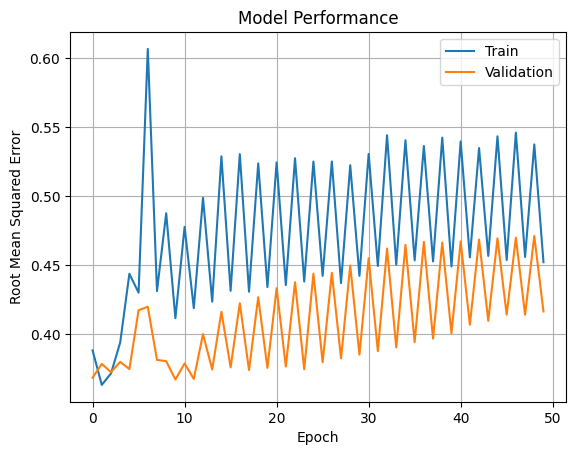

In [49]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Performance')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

Hasil pelatihan selama 50 epoch menunjukkan bahwa model mencapai performa validasi terbaik pada epoch kedua, dengan nilai RMSE validasi mendekati 0.37. Setelah itu, performa validasi secara bertahap mulai menurun, yang terlihat dari meningkatnya nilai RMSE validasi hingga akhir pelatihan. Pola fluktuatif pada kurva RMSE training dan validation menunjukkan adanya ketidakstabilan dalam proses pembelajaran. Meskipun terdapat penurunan RMSE sesekali, tren keseluruhan tetap mengindikasikan bahwa model mengalami overfitting setelah beberapa epoch awal. Hal ini ditandai dengan RMSE training yang terus berfluktuasi tinggi dan RMSE validasi yang secara konsisten memburuk setelah titik optimal awal. Dengan demikian, model seharusnya dihentikan lebih awal menggunakan teknik early stopping, agar performa terbaik pada epoch awal dapat dipertahankan.

## **Mendapatkan Rekomendasi Buku**

### Memastikan `User_id` Valid dalam Data Training

Untuk menghasilkan rekomendasi yang konsisten dan dapat direproduksi, diperlukan pengguna (`User_id`) yang **pasti terdapat dalam data training**.

In [50]:
# Ambil df_user dari X_train
train_user_encoded_ids = np.unique(x_train[:, 0]) # Access the first column and get unique values

# Decode kembali ke User_id asli
train_user_ids = [df_user_encoded_to_df_user[i] for i in train_user_encoded_ids]

# 20 user paling aktif dari cf_df
top_active_users = cf_df['User_id'].value_counts().head(20).index.tolist()

# Cek mana dari mereka yang masuk ke data training
valid_users_in_training = [uid for uid in top_active_users if uid in train_user_ids]

print("User paling aktif yang juga ada di data training:")
print(valid_users_in_training)

User paling aktif yang juga ada di data training:
[11676, 198711, 153662, 98391, 35859, 212898, 278418, 76352, 110973, 235105, 16795, 230522, 204864, 234623, 36836, 245963, 55492, 102967, 227447, 185233]


Misalnya kita mendapat `user_id` = 278418




In [51]:
def recommend_df_books_for_df_user(df_user_id, model, cf_df,
                                   df_user_to_df_user_encoded, df_user_encoded_to_df_user,
                                   book_to_book_encoded, book_encoded_to_book, top_k=10):
    if df_user_id not in df_user_to_df_user_encoded:
        print(f"User {df_user_id} tidak ditemukan di data training.")
        return pd.DataFrame()

    df_user_encoded = df_user_to_df_user_encoded[df_user_id]

    # Buku yang sudah dibaca user
    df_books_read = cf_df[cf_df['User_id'] == df_user_id]['ISBN'].unique()
    df_books_not_read = [isbn for isbn in book_to_book_encoded.keys() if isbn not in df_books_read]
    df_books_not_read_encoded = [book_to_book_encoded[isbn] for isbn in df_books_not_read]

    df_user_array = np.array([df_user_encoded] * len(df_books_not_read_encoded))
    book_array = np.array(df_books_not_read_encoded)
    input_array = np.vstack((df_user_array, book_array)).T

    # Prediksi rating
    pred_df_ratings = model.predict(input_array, verbose=0).flatten()

    top_indices = pred_df_ratings.argsort()[-top_k:][::-1]
    top_book_encoded = [df_books_not_read_encoded[i] for i in top_indices]
    top_book_isbn = [book_encoded_to_book[i] for i in top_book_encoded]
    top_scores = [pred_df_ratings[i] for i in top_indices]

    # Ambil judul buku
    titles = []
    for isbn in top_book_isbn:
        title_row = cf_df[cf_df['ISBN'] == isbn]['Title']
        title = title_row.values[0] if not title_row.empty else "Judul tidak ditemukan"
        titles.append(title)

    # Buat DataFrame hasil rekomendasi
    recommendation_df = pd.DataFrame({
        'No': range(1, top_k + 1),
        'ISBN': top_book_isbn,
        'Title': titles,
        'Predicted Rating': top_scores
    })

    print(f"\nRekomendasi {top_k} buku untuk df_user {df_user_id}:\n")

    return recommendation_df

specific_user_id = 278418
df_user_sample = df_user_to_df_user_encoded[specific_user_id]

recommend_df_books_for_df_user(
    specific_user_id,
    model,
    cf_df,
    df_user_to_df_user_encoded,
    df_user_encoded_to_df_user,
    book_to_book_encoded,
    book_encoded_to_book,
    top_k=10
)


Rekomendasi 10 buku untuk df_user 278418:



,No,ISBN,Title,Predicted Rating
0,1,1844262553,Free,0.000743
1,2,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),0.000270
2,3,0836213122,There's Treasure Everywhere--A Calvin and Hobb...,0.000232
3,4,0812968379,Funny in Farsi : A Memoir of Growing Up Irania...,0.000220
4,5,0394800389,Fox in Socks (I Can Read It All by Myself Begi...,0.000205
5,6,0393050939,Stiff: The Curious Lives of Human Cadavers,0.000194
6,7,0091842050,The Blue Day Book: A Lesson in Cheering Yourse...,0.000189
7,8,0425174484,"Expecting Adam: A True Story of Birth, Rebirth...",0.000183
8,9,0505523752,Dark Gold,0.000176
9,10,0439064864,Harry Potter and the Chamber of Secrets (Book 2),0.000174


Model berhasil memberikan rekomendasi buku yang mencerminkan pola preferensi pengguna terhadap bacaan anak-anak, memoar personal, serta nonfiksi populer dengan pendekatan yang ringan dan mudah diakses. Hal ini terlihat dari munculnya *Free* sebagai judul dengan prediksi tertinggi, serta kehadiran dua buku dari seri *Harry Potter*, yang mengindikasikan kemungkinan minat pengguna pada cerita fiksi imajinatif yang ringan dan menghibur.

Selain itu, buku seperti *Funny in Farsi* dan *Expecting Adam* menunjukkan ketertarikan pada narasi berbasis pengalaman pribadi yang menyentuh dan mengandung unsur reflektif, dengan tema seputar keluarga dan kehidupan sehari-hari. Judul seperti *Stiff: The Curious Lives of Human Cadavers* dan *The Blue Day Book* menambah indikasi bahwa pengguna juga memiliki minat terhadap bacaan nonfiksi yang mengedukasi namun disampaikan secara ringan, dengan gaya humor atau narasi yang menyenangkan.

Secara keseluruhan, hasil ini menunjukkan bahwa model Collaborative Filtering mampu mengenali preferensi pengguna terhadap bacaan yang bersifat menghibur, reflektif, dan mudah diakses, baik dalam bentuk fiksi maupun nonfiksi, serta menyarankan variasi genre yang relevan dengan pola minat tersebut.

